In [1]:
!ls -la # using command line syntax in Jupyter

total 4912
drwxr-xr-x   7 dia  staff      224 Mar 15 14:02 .
drwxr-xr-x  13 dia  staff      416 Feb 28 15:23 ..
-rw-r--r--@  1 dia  staff     6148 Feb 27 18:47 .DS_Store
drwxr-xr-x   3 dia  staff       96 Feb 27 17:52 .ipynb_checkpoints
-rw-r--r--   1 dia  staff   382718 Mar 15 14:02 Basic.ipynb
-rwxr-xr-x@  1 dia  staff  1060864 Feb  1 00:56 chinook-unmodified.db
-rwxr-xr-x@  1 dia  staff  1060864 Mar  1 21:08 chinook.db


# Creating Helper Functions

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

* original method

    <p>conn = sqlite3.connect("chinook.db")</p>
    <p>q = "SELECT * FROM sqlite_master WHERE type='table';"</p>
    <p>pd.read_sql_query(q, conn)</p>

In [3]:
def run_query(q):
    with sqlite3.connect("chinook.db") as conn:
        return pd.read_sql_query(q, conn)

In [4]:
def run_command(c):
    with sqlite3.connect("chinook.db") as conn:
        conn.isolation_level = None
        return conn.execute(c)
    

In [5]:
def show_tables():
    q = "SELECT type, name FROM sqlite_master WHERE type IN ('table', 'view');"
    return run_query(q)

In [6]:
show_tables()

,type,name
0,table,album
1,table,artist
2,table,customer
3,table,employee
4,table,genre
5,table,invoice
6,table,invoice_line
7,table,media_type
8,table,playlist
9,table,playlist_track


# Selecting Albums to Purchase

In [7]:
q1 = '''
SELECT * FROM sqlite_master WHERE type IN ("table", "view");'''
run_query(q1)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [8]:
q2 = "SELECT * FROM invoice;"
invoice = run_query(q2)
invoice

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83
5,6,31,2017-01-10 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,1.98
6,7,49,2017-01-12 00:00:00,Ordynacka 10,Warsaw,None,Poland,00-358,10.89
7,8,59,2017-01-13 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,9.90
8,9,18,2017-01-18 00:00:00,627 Broadway,New York,NY,USA,10012-2612,8.91
9,10,31,2017-01-18 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,1.98


In [9]:
q3 = "SELECT * from invoice_line;"
invoice_line = run_query(q3)
invoice_line

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


### * Write a query that returns each enre, with the number of tracks sold in absolute numbers and in percentages.
### * Create a plot to show this data.
### * Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should  purchase for the store, based on sales of tracks from their genres.

In [10]:
albums_to_purchase = '''
WITH track_sold_in_usa AS
    (
    SELECT il.invoice_line_id, il.track_id, i.invoice_id, i.billing_country
    FROM invoice i
    INNER JOIN invoice_line il ON i.invoice_id == il.invoice_id
    WHERE billing_country == "USA"
    )

SELECT g.name, COUNT(tsiu.invoice_line_id) track_sold, CAST(COUNT(tsiu.invoice_line_id) AS FLOAT)/(SELECT COUNT(*) FROM track_sold_in_usa) percentage
FROM track_sold_in_usa tsiu
INNER JOIN track t ON tsiu.track_id == t.track_id
INNER JOIN genre g ON g.genre_id == t.genre_id
GROUP BY g.name
ORDER BY track_sold DESC
'''

run_query(albums_to_purchase)

,name,track_sold,percentage
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


In [11]:
genre_sales_usa = run_query(albums_to_purchase)
genre_sales_usa

,name,track_sold,percentage
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


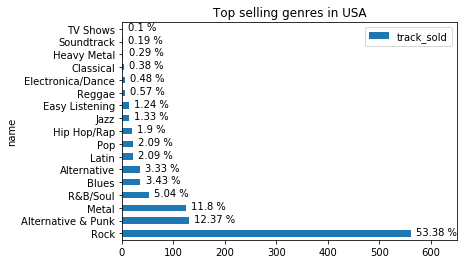

In [12]:
ax = genre_sales_usa.plot.barh(x = "name", y = "track_sold", title = "Top selling genres in USA", xlim=(0,650))
for i, label in enumerate(list(genre_sales_usa.name)):
    s = genre_sales_usa.loc[i, "track_sold"]
    p = round(genre_sales_usa.loc[i, "percentage"]*100,2).astype(str)+ " %"
    plt.annotate(p, (s+10,i-0.1))
plt.show()

In [13]:
albums_to_purchase = '''
WITH track_sold_in_usa AS
    (
    SELECT il.invoice_line_id, il.track_id, i.invoice_id, i.billing_country
    FROM invoice i
    INNER JOIN invoice_line il ON i.invoice_id == il.invoice_id
    WHERE billing_country == "USA"
    )

SELECT g.name genre,
       a.title album,
       ar.name artist,
       COUNT(tsiu.invoice_line_id) "tracks sold",
       tsiu.billing_country
FROM track_sold_in_usa tsiu
INNER JOIN track t ON tsiu.track_id == t.track_id
INNER JOIN genre g ON g.genre_id == t.genre_id
INNER JOIN album a ON a.album_id == t.album_id
INNER JOIN artist ar ON a.artist_id == ar.artist_id
WHERE g.name IN ("Rock", "Alternative & Punk", "Metal")
GROUP BY a.title
ORDER BY COUNT(tsiu.invoice_line_id) DESC
'''
run_query(albums_to_purchase)

,genre,album,artist,tracks sold,billing_country
0,Rock,Are You Experienced?,Jimi Hendrix,28,USA
1,Rock,From The Muddy Banks Of The Wishkah [live],Nirvana,28,USA
2,Rock,The Doors,The Doors,27,USA
3,Alternative & Punk,Green,R.E.M.,25,USA
4,Rock,"Hot Rocks, 1964-1971 (Disc 1)",The Rolling Stones,25,USA
5,Rock,Use Your Illusion I,Guns N' Roses,23,USA
6,Metal,Mezmerize,System Of A Down,22,USA
7,Rock,20th Century Masters - The Millennium Collecti...,Scorpions,21,USA
8,Rock,Facelift,Alice In Chains,21,USA
9,Rock,"The Best Of Van Halen, Vol. I",Van Halen,21,USA


### FINDING:
I would recommand the first three best seller artists in USA below:
    * Jimi Hendrix (Rock)
    * R.E.M. (Alternative & Punk)
    * System of A Down (Metal)

# Analyzing  Employee Sales performance

In [14]:
q4 = '''
SELECT * FROM employee;'''
employee = run_query(q4)
employee

,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [15]:
q5 = '''
SELECT * FROM customer;'''
customer = run_query(q5)
customer

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


### * Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.
### * Create a plot of the results of your query.
### * Write a short statement describing your results, and providing a possible interpretation.

In [16]:
employee_performance = '''
WITH each_customer_cost AS    
    (
    SELECT
        SUM(i.total) total,
        c.customer_id,
        c.support_rep_id
    FROM invoice i
    INNER JOIN customer c ON i.customer_id = c.customer_id
    GROUP BY c.customer_id
    )
SELECT
    e.first_name || " " || e.last_name employee,
    SUM(ecc.total) "total sales",
    e.hire_date
FROM each_customer_cost ecc
INNER JOIN employee e ON ecc.support_rep_id = e.employee_id
GROUP BY e.employee_id
    
'''    
employee_contribution = run_query(employee_performance)
employee_contribution

,employee,total sales,hire_date
0,Jane Peacock,1731.51,2017-04-01 00:00:00
1,Margaret Park,1584.00,2017-05-03 00:00:00
2,Steve Johnson,1393.92,2017-10-17 00:00:00


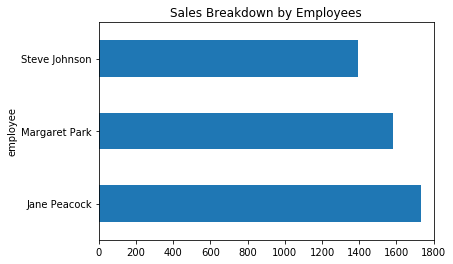

In [17]:
employee_contribution.plot.barh(x="employee", y="total sales", title="Sales Breakdown by Employees", legend=False, xlim=(0,1800))


### FINDING:
We can see from the graph above that employees with earlier hire dates perform better than the newer ones. 

### Skill: putting a specific row to the top or bottom.

In [18]:
qq = "SELECT * FROM top_5_names;"
run_query(qq)

,first_name,count
0,Frank,2
1,Mark,2
2,Aaron,1
3,Alexandre,1
4,Astrid,1


In [19]:
qqq = '''
SELECT
    t5.*,
    CASE
        WHEN t5.first_name = "Mark" THEN 1
        ELSE 0
    END AS sort
FROM top_5_names t5
'''
run_query(qqq)

,first_name,count,sort
0,Frank,2,0
1,Mark,2,1
2,Aaron,1,0
3,Alexandre,1,0
4,Astrid,1,0


### Write a query that collates data on purchases from different countries. For each country, include:
    * total number of customers
    * total value of sales
    * average value of sales per customer
    * average order value
### Where a country has only one customer, collect them into an "Other" group.
### The results should be sorted by the total sales from highest to lowest, with the "Other" group at the very bottom.

In [20]:
sales_info = '''
WITH with_others_country AS
    (
    SELECT
        CASE
            WHEN(
                SELECT COUNT(*)
                FROM customer
                WHERE country = c.country
                ) = 1 THEN "Others"
            ELSE c.country
        END AS country,
        COUNT(distinct i.customer_id) customers,
        SUM(i.total) total_sales,
        COUNT(distinct i.invoice_id) invoices
    FROM customer c 
    INNER JOIN invoice i ON c.customer_id = i.customer_id
    GROUP BY 1
    ORDER BY 3 DESC
    )
SELECT
    country,
    customers,
    total_sales,
    average_sales_per_customer,
    average_order
FROM
    (
    SELECT
        country,
        customers,
        total_sales,
        CAST(total_sales AS FLOAT)/customers AS average_sales_per_customer,
        CAST(total_sales AS FLOAT)/invoices AS average_order,
        CASE
                WHEN country = "Others" THEN 1
                ELSE 0
            END AS sort
    FROM with_others_country
    ORDER BY 6 ASC
    );
'''
country_sales = run_query(sales_info)
country_sales

,country,customers,total_sales,average_sales_per_customer,average_order
0,USA,13,1040.49,80.037692,7.942672
1,Canada,8,535.59,66.948750,7.047237
2,Brazil,5,427.68,85.536000,7.011148
3,France,5,389.07,77.814000,7.781400
4,Germany,4,334.62,83.655000,8.161463
5,Czech Republic,2,273.24,136.620000,9.108000
6,United Kingdom,3,245.52,81.840000,8.768571
7,Portugal,2,185.13,92.565000,6.383793
8,India,2,183.15,91.575000,8.721429
9,Others,15,1094.94,72.996000,7.448571


In [21]:
test = '''
WITH with_others_country AS
    (
    SELECT
            CASE
                WHEN(
                    SELECT COUNT(*)
                    FROM customer
                    WHERE country = c.country
                    ) = 1 THEN "Others"
                ELSE c.country
            END AS country,
            COUNT(distinct i.customer_id) customers,
            SUM(i.total) total_sales,
            COUNT(distinct i.invoice_id) invoices
    FROM customer c 
    INNER JOIN invoice i ON c.customer_id = i.customer_id
    GROUP BY 1
    ORDER BY 3 DESC
    )
    
SELECT
        country,
        customers,
        total_sales,
        CAST(total_sales AS FLOAT)/customers AS average_sales_per_customer,
        CAST(total_sales AS FLOAT)/invoices AS average_order,
        CASE
                WHEN country = "Others" THEN 1
                ELSE 0
            END AS sort
    FROM with_others_country
    ORDER BY 6 ASC
'''
run_query(test)

,country,customers,total_sales,average_sales_per_customer,average_order,sort
0,USA,13,1040.49,80.037692,7.942672,0
1,Canada,8,535.59,66.948750,7.047237,0
2,Brazil,5,427.68,85.536000,7.011148,0
3,France,5,389.07,77.814000,7.781400,0
4,Germany,4,334.62,83.655000,8.161463,0
5,Czech Republic,2,273.24,136.620000,9.108000,0
6,United Kingdom,3,245.52,81.840000,8.768571,0
7,Portugal,2,185.13,92.565000,6.383793,0
8,India,2,183.15,91.575000,8.721429,0
9,Others,15,1094.94,72.996000,7.448571,1


In [22]:
country_sales.set_index("country", inplace=True)

/Users/dia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,0,'')

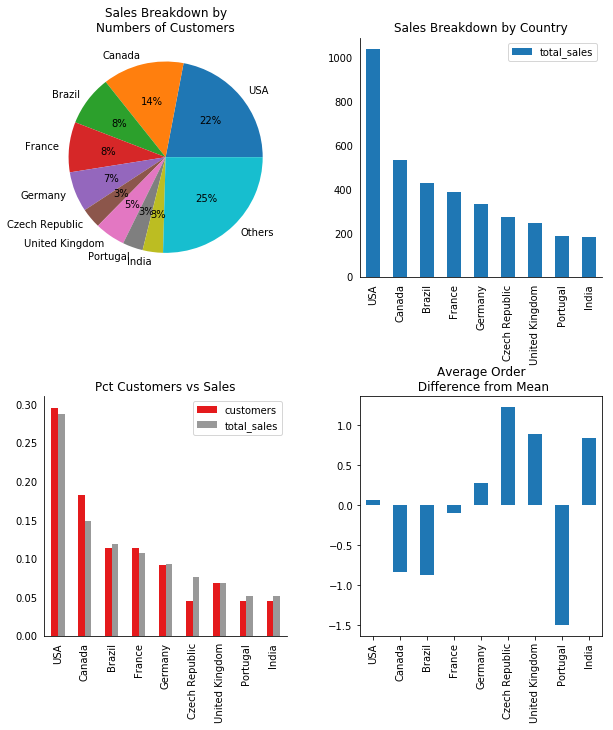

In [23]:
fig, axes = plt.subplots(2,2, figsize=(10,11))
ax1,ax2,ax3,ax4= axes.flatten()
fig.subplots_adjust(hspace=0.5, wspace=.3)

# TOP LEFT
country_sales.plot(y="customers", kind="pie", ax=ax1, legend=False, title="Sales Breakdown by\nNumbers of Customers",autopct='%1.0f%%')
ax1.set_ylabel("")

#TOP RIGHT
country_sales.drop("Others", inplace=True)
country_sales.plot(y="total_sales", kind="bar", ax=ax2, title="Sales Breakdown by Country")
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_xlabel("")

#BOTTOM LEFT
cols = ["customers","total_sales"]
custs_vs_dollars = country_sales[cols]
for c in cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum()
custs_vs_dollars.plot(
    ax=ax3,
    kind="bar",
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_xlabel("")


#BOTTOM RIGHT
country_sales["average_order"] -= country_sales["average_order"].mean()
country_sales.plot(y="average_order", kind="bar", ax=ax4, title="Average Order\n Difference from Mean", legend=False)
ax4.set_xlabel("")

### FINDING:
We can see from the bottom right graph that markets of country Czech Republic, United Kingdom, India have the most possibile potential for growth.

### Write a query that categorizes each invoice as either an album purchase or not, and calculates the following summary statistics:
    * Number of invoices
    * Percentage of invoices
### Write one to two sentences explaining your findings, and making a prospective recommendation on whether the Chinook store should continue to buy full albums from record companies

In [24]:
ls_each_album = '''
SELECT * FROM track
ORDER BY album_id
'''
run_query(ls_each_album)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
5,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99
6,11,C.O.D.,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",199836,6566314,0.99
7,12,Breaking The Rules,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263288,8596840,0.99
8,13,Night Of The Long Knives,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205688,6706347,0.99
9,14,Spellbound,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",270863,8817038,0.99


In [25]:
invoice_line

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


In [26]:
album_purchase = '''
WITH invoice_first_track AS    
    (
    SELECT
        MIN(track_id) track_id,
        invoice_id
    FROM invoice_line il
    GROUP BY invoice_id
    )
SELECT
    Album_Purchase,
    COUNT(album_purchase) Number_of_Invoices,
    CAST(COUNT(album_purchase) AS FLOAT)/(SELECT COUNT(invoice_id) FROM invoice_first_track) AS Percentage
FROM
    (SELECT
        ift.*,
        CASE
            WHEN
                (
                SELECT il1.track_id FROM invoice_line il1
                WHERE il1.invoice_id = ift.invoice_id
                EXCEPT
                SELECT track_id FROM track t1
                WHERE t1.album_id = (SELECT album_id FROM track t2
                                    WHERE t2.track_id = ift.track_id)
                ) is NULL
            AND
                (
                SELECT track_id FROM track t1
                WHERE t1.album_id = (SELECT album_id FROM track t2
                                     WHERE t2.track_id = ift.track_id)
                EXCEPT
                SELECT track_id FROM invoice_line il1
                WHERE il1.invoice_id = ift.invoice_id
                ) is NULL
            THEN "YES"
            ELSE "NO"
        END AS Album_Purchase
    FROM invoice_first_track ift)
GROUP BY 1

'''
run_query(album_purchase)

,Album_Purchase,Number_of_Invoices,Percentage
0,NO,500,0.814332
1,YES,114,0.185668


### FINDINGS:
There is still around 18.5% of purchase belongs to the type of whole album purchase, so it would be better to keep the option for customers like purchasing tracks from a whole album.